In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
covid19 = pd.read_csv('https://raw.githubusercontent.com/ammishra08/COVID-19/master/covid_19_datasets/covid_19_globaldata/covid_19_world.csv')

In [3]:
covid19

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
116800,116801,09/23/2020,Zaporizhia Oblast,Ukraine,2020-09-24 04:23:38,3149.0,49.0,1158.0
116801,116802,09/23/2020,Zeeland,Netherlands,2020-09-24 04:23:38,1270.0,72.0,0.0
116802,116803,09/23/2020,Zhejiang,Mainland China,2020-09-24 04:23:38,1282.0,1.0,1272.0
116803,116804,09/23/2020,Zhytomyr Oblast,Ukraine,2020-09-24 04:23:38,5191.0,92.0,2853.0


In [4]:
covid19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116805 entries, 0 to 116804
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              116805 non-null  int64  
 1   ObservationDate  116805 non-null  object 
 2   Province/State   81452 non-null   object 
 3   Country/Region   116805 non-null  object 
 4   Last Update      116805 non-null  object 
 5   Confirmed        116805 non-null  float64
 6   Deaths           116805 non-null  float64
 7   Recovered        116805 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 7.1+ MB


In [5]:
# Typecasting in DateTime Format
covid19['ObservationDate'] = pd.to_datetime(covid19['ObservationDate'])

In [6]:
covid19

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
116800,116801,2020-09-23,Zaporizhia Oblast,Ukraine,2020-09-24 04:23:38,3149.0,49.0,1158.0
116801,116802,2020-09-23,Zeeland,Netherlands,2020-09-24 04:23:38,1270.0,72.0,0.0
116802,116803,2020-09-23,Zhejiang,Mainland China,2020-09-24 04:23:38,1282.0,1.0,1272.0
116803,116804,2020-09-23,Zhytomyr Oblast,Ukraine,2020-09-24 04:23:38,5191.0,92.0,2853.0


In [7]:
covid19_datewise = covid19.groupby(['ObservationDate']).agg({'Confirmed' : 'sum', 'Deaths' : 'sum', 'Recovered' : 'sum'})

In [8]:
covid19_datewise

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0
...,...,...,...
2020-09-19,30688150.0,955866.0,20922189.0
2020-09-20,30935011.0,959565.0,21159459.0
2020-09-21,31245797.0,963693.0,21394593.0


In [9]:
covid19_datewise['Active'] = covid19_datewise['Confirmed'] - covid19_datewise['Deaths'] - covid19_datewise['Recovered']

In [10]:
covid19_datewise

,Confirmed,Deaths,Recovered,Active
ObservationDate,,,,
2020-01-22,555.0,17.0,28.0,510.0
2020-01-23,653.0,18.0,30.0,605.0
2020-01-24,941.0,26.0,36.0,879.0
2020-01-25,1438.0,42.0,39.0,1357.0
2020-01-26,2118.0,56.0,52.0,2010.0
...,...,...,...,...
2020-09-19,30688150.0,955866.0,20922189.0,8810095.0
2020-09-20,30935011.0,959565.0,21159459.0,8815987.0
2020-09-21,31245797.0,963693.0,21394593.0,8887511.0


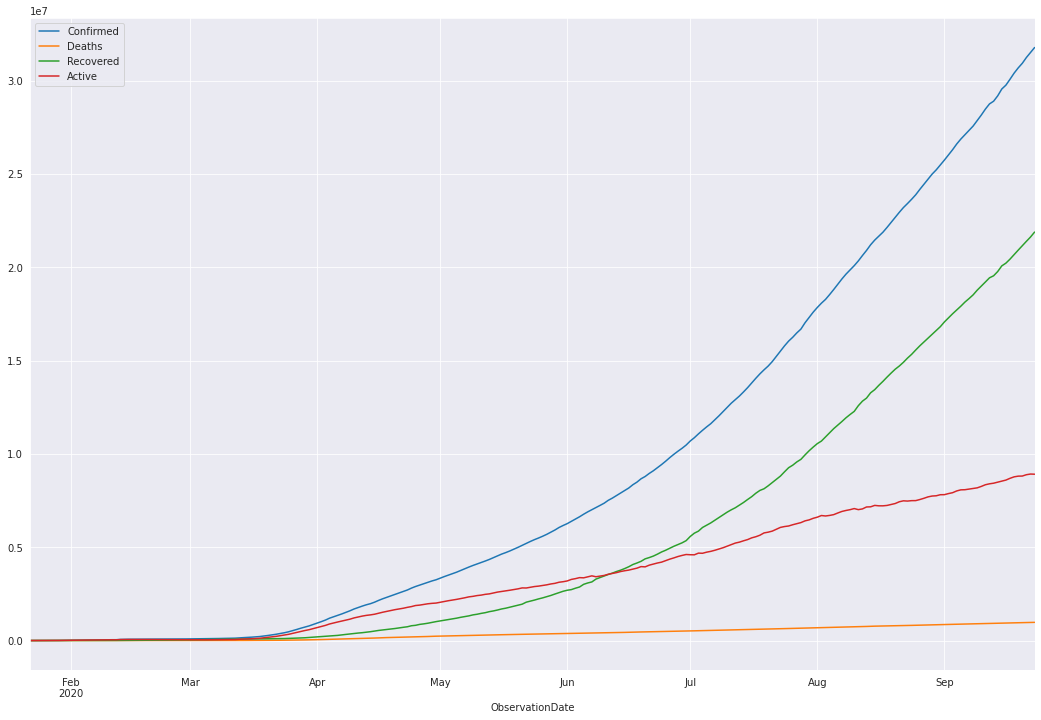

In [11]:
sns.set_style('darkgrid')
covid19_datewise.plot(figsize = (18, 12))

In [12]:
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected = True)

In [13]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

In [14]:
configure_plotly_browser_state()
init_notebook_mode(connected=True)
covid19_datewise['Confirmed'].iplot(title = 'Summation cases of confirmed Covid - 19')

In [15]:
configure_plotly_browser_state()
init_notebook_mode(connected=True)
covid19_datewise['Confirmed'].diff().iplot(title = 'Daywise cases of confirmed Covid - 19')

**Covid19 - India Analysis**

In [16]:
covid_data = covid19[covid19['Country/Region'] == 'India']

In [17]:
covid_data = covid_data.groupby(['ObservationDate']).agg({'Confirmed' : 'sum', 'Deaths' : 'sum', 'Recovered' : 'sum'})

In [18]:
covid_data

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-30,1.0,0.0,0.0
2020-01-31,1.0,0.0,0.0
2020-02-01,1.0,0.0,0.0
2020-02-02,2.0,0.0,0.0
2020-02-03,3.0,0.0,0.0
...,...,...,...
2020-09-19,5308014.0,85619.0,4208431.0
2020-09-20,5400619.0,86752.0,4303043.0
2020-09-21,5487580.0,87882.0,4396399.0


In [19]:
configure_plotly_browser_state()
init_notebook_mode(connected=True)
covid_data.iplot(title = 'Total Number of Cases of Covid-19')

In [20]:
configure_plotly_browser_state()
init_notebook_mode(connected=True)
covid_data['Confirmed'].diff().iplot(title = 'Total Number of Cases of Covid-19', color = 'blue')

In [21]:
covid_data

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-30,1.0,0.0,0.0
2020-01-31,1.0,0.0,0.0
2020-02-01,1.0,0.0,0.0
2020-02-02,2.0,0.0,0.0
2020-02-03,3.0,0.0,0.0
...,...,...,...
2020-09-19,5308014.0,85619.0,4208431.0
2020-09-20,5400619.0,86752.0,4303043.0
2020-09-21,5487580.0,87882.0,4396399.0


In [22]:
covid_data.isnull().sum()

Confirmed    0
Deaths       0
Recovered    0
dtype: int64

In [23]:
# To Get Back indexing of data 
covid_data.reset_index(inplace = True)
covid_data.drop(['ObservationDate', 'Deaths', 'Recovered'], axis = 1, inplace = True)

**Train & Test Split**

In [24]:
# Train & Test in Time Series Forescating not splitting using randomization but in sequence (first 90% : 10%)
train_data = covid_data[ 0 : len(covid_data) - 10]

In [25]:
train_data

,Confirmed
0,1.0
1,1.0
2,1.0
3,2.0
4,3.0
...,...
223,4465863.0
224,4562414.0
225,4659984.0
226,4754356.0


In [26]:
test_data = covid_data[len(covid_data) - 10 :]

In [27]:
test_data

,Confirmed
228,4846427.0
229,5020359.0
230,5020359.0
231,5118253.0
232,5214677.0
233,5308014.0
234,5400619.0
235,5487580.0
236,5562663.0
237,5646010.0


**Data Preprocessing**

In [28]:
# Min Max Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_data)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [29]:
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

**LSTM Model**

In [30]:
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dropout
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [31]:
n_input = 10
n_feature = 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length= n_input, batch_size=1)

In [32]:
lstm_model = Sequential()
# Layer - I
lstm_model.add(LSTM( units = 64, return_sequences = True, input_shape = (n_input, n_feature)))
lstm_model.add(Dropout(0.2))
# Layer - II
lstm_model.add(LSTM( units = 64, return_sequences = True ))
lstm_model.add(Dropout(0.2))
# Layer - III
lstm_model.add(LSTM( units = 64, return_sequences = True ))
lstm_model.add(Dropout(0.2))
# Layer - IV
lstm_model.add(LSTM( units = 64, return_sequences = True ))
lstm_model.add(Dropout(0.2))
# Regression LSTM Layer - 1
lstm_model.add(LSTM (units = 1))

# Regression 
lstm_model.compile(optimizer = 'Adam', loss = 'mean_squared_error')

lstm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 64)            16896     
_________________________________________________________________
dropout (Dropout)            (None, 10, 64)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 64)            33024     
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 64)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 10, 64)            33024     
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 64)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 10, 64)            3

In [33]:
results = lstm_model.fit(generator, epochs = 100)

Epoch 1/100
218/218 [==============================] - 2s 8ms/step - loss: 0.0180
Epoch 2/100
218/218 [==============================] - 2s 8ms/step - loss: 0.0028
Epoch 3/100
218/218 [==============================] - 2s 9ms/step - loss: 0.0025
Epoch 4/100
218/218 [==============================] - 2s 8ms/step - loss: 0.0024
Epoch 5/100
218/218 [==============================] - 2s 8ms/step - loss: 0.0011
Epoch 6/100
218/218 [==============================] - 2s 9ms/step - loss: 0.0018
Epoch 7/100
218/218 [==============================] - 2s 8ms/step - loss: 0.0019
Epoch 8/100
218/218 [==============================] - 2s 8ms/step - loss: 0.0018
Epoch 9/100
218/218 [==============================] - 2s 8ms/step - loss: 0.0021
Epoch 10/100
218/218 [==============================] - 2s 8ms/step - loss: 0.0011
Epoch 11/100
218/218 [==============================] - 2s 8ms/step - loss: 6.0472e-04
Epoch 12/100
218/218 [==============================] - 2s 8ms/step - loss: 0.0018
Epoch 13/

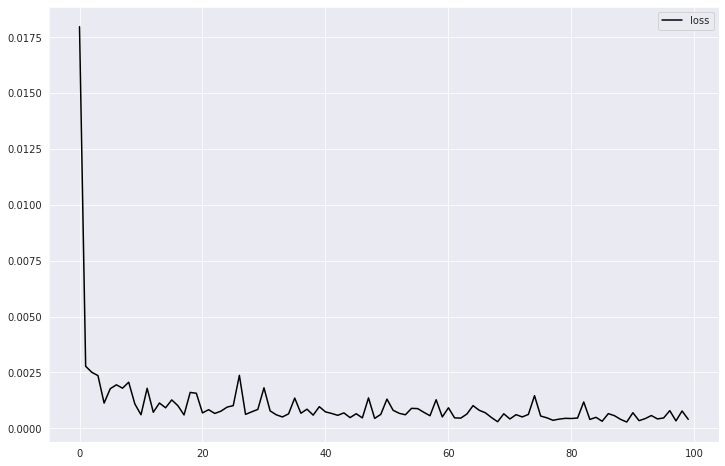

In [35]:
pd.DataFrame(results.history).plot(figsize = (12,8), color = 'Black')

In [36]:
lstm_predictions_scaled = []
batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_feature))
for i in range(len(test_data)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

In [37]:
# scaler.inverse_transform - Reverse the transformed o/p
prediction = pd.DataFrame(scaler.inverse_transform(lstm_predictions_scaled))
np.round(prediction)

,0
0,4640340.0
1,4650910.0
2,4658366.0
3,4663654.0
4,4667423.0
5,4669901.0
6,4671331.0
7,4671919.0
8,4671824.0
9,4671228.0
